In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('wordnet')
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vacha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vacha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_excel("Test data.xlsx",sheet_name = "Sheet1")
df = df.drop(['Label'], axis = 1)
df = df.drop(['Date of review'], axis = 1)

df.dropna(axis=0,inplace = True)
df.isna().sum()
df.isnull().sum(axis = 1)
df.loc[df.SENTIMENT == "positive", "SENTIMENT"] = 1
df.loc[df.SENTIMENT == "Negative", "SENTIMENT"] = 0
df.SENTIMENT.unique()

array([1, 0], dtype=object)

In [3]:
feedback, sentiment = list(df['Actual Feedback']), list(df['SENTIMENT'])

In [4]:
def preprocess(textdata):
    processedText = []
    
    wordLemm = WordNetLemmatizer()
    sent = "[^a-zA-Z0-9]"
    
    for text in textdata:
        text = text.lower()
        text = re.sub(sent, " ", text)
        
        words = ''
        for word in text.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                words += (word+' ')
        processedText.append(words)
    return processedText

In [5]:
processedtext = preprocess(feedback)

C:\Users\vacha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SENTIMENT', ylabel='count'>

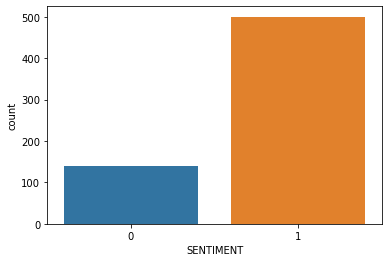

In [6]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.05, random_state = 42)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50)
vectoriser.fit(X_train)
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

sns.countplot('SENTIMENT', data = df)

In [7]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    score = int(accuracy_score(y_test,y_pred)*100)
    round(score, 2)
    print(f"Accuracy Score of {model} : {score}%")

In [8]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

Accuracy Score of BernoulliNB(alpha=2) : 84%


In [9]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

Accuracy Score of LinearSVC() : 81%


In [10]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

Accuracy Score of LogisticRegression(C=2, max_iter=1000) : 81%


In [11]:
def predict(vectoriser, model, text):
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    df = pd.DataFrame(data, columns = ['Actual Feedback','SENTIMENT'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [12]:
text = ["I did not like it", "i do not like that manager", "I am not funny", "I liked it"]
    
df = predict(vectoriser, LRmodel, text)
print(df.head())

              Actual Feedback SENTIMENT
0           I did not like it  Negative
1  i do not like that manager  Negative
2              I am not funny  Negative
3                  I liked it  Positive


In [13]:
text

['I did not like it',
 'i do not like that manager',
 'I am not funny',
 'I liked it']